<a href="https://colab.research.google.com/github/21anonymous/Advance-nuclear-physics-lab-/blob/main/total_cross_section_by_compton_scattering_experiment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

experiment -1


 1. finding the activity of cs source


In [ ]:
from datetime import datetime
# Activity calculation
def activity(N0, half_life, time):
    """
    Calculate activity of a radioactive source.
    N0: Initial number of atoms
    half_life: Half-life of the isotope (seconds)
    time: Time elapsed (seconds)
    Returns activity in becquerels (Bq)
    """
    lambda_decay = np.log(2) / half_life  # Decay constant
    N_t = N0 * np.exp(-lambda_decay * time)  # Remaining nuclei
    return lambda_decay * N_t  # Activity in Bq

# User input
mass_Cs137 = float(input("Enter the mass of Cesium-137 sample in grams: "))
manufacture_date = input("Enter the manufacture date (YYYY-MM-DD): ")
manufacture_date = datetime.strptime(manufacture_date, "%Y-%m-%d")
current_date = datetime.now()
time_elapsed = (current_date - manufacture_date).total_seconds()

M_Cs137 = 137.0  # Molar mass of Cesium-137 (g/mol)
half_life_Cs137 = 30.17 * 365.25 * 24 * 3600  # Half-life in seconds
NA = 6.022e23  # Avogadro's number
# Initial number of atoms
N0 = (mass_Cs137 / M_Cs137) * NA

# Current activity
current_activity = activity(N0, half_life_Cs137, time_elapsed)
print(f"Current activity of the sample: {current_activity:.2e} Bq")


2. pulse height spectrum

Please upload your Gaia data excel file:


Saving pulse height .xlsx to pulse height  (6).xlsx
File 'pulse height  (6).xlsx' uploaded successfully!


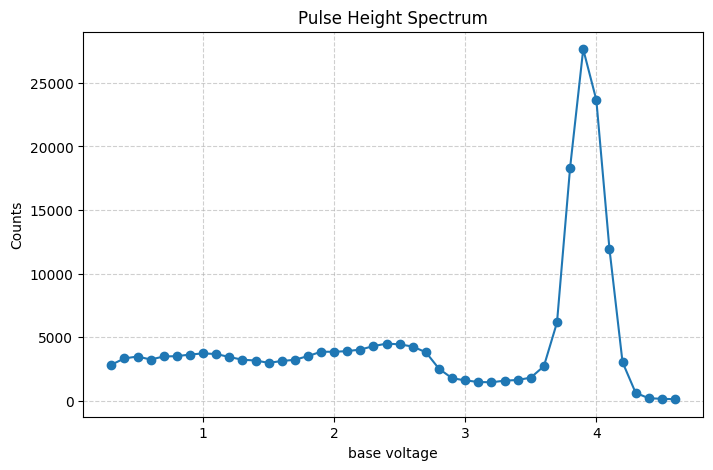

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

print("Please upload your Gaia data excel file:")
uploaded = files.upload()
# Load the uploaded file into a pandas DataFrame
filename = list(uploaded.keys())[0]  # Get the uploaded file name
# Assuming the file is an excel file. If it is a csv you can change it back to pd.read_csv
# Added encoding='latin1' or 'ISO-8859-1' or 'cp1252'
df = pd.read_excel(filename, engine='openpyxl')
    #df = pd.read_excel(filename, engine='openpyxl', encoding='ISO-8859-1') # try a different encoding

print(f"File '{filename}' uploaded successfully!")

# Plot pulse height spectrum
def plot_spectrum(df,x_col,y_col):
    """
    Plots the pulse height spectrum as a curve connecting points.
    """
    plt.figure(figsize=(8, 5))
    # Sort data by x_col for a smooth curve
    df_sorted = df.sort_values(by=[x_col])

    # Plot the curve
    plt.plot(df_sorted[x_col], df_sorted[y_col], marker='o', linestyle='-')

    plt.xlabel('base voltage')
    plt.ylabel('Counts')  # Counts are now represented by the index
    plt.title('Pulse Height Spectrum')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()
# Ensure the correct column exists
if 'counts' not in df.columns:
    raise ValueError("Excel file must contain a 'Pulse Height' column.")

#  Plot the spectrum using the correct column names
plot_spectrum(df, x_col='base voltage', y_col='counts')


Please upload your Gaia data excel file:


Saving differential cross -section .xlsx to differential cross -section  (4).xlsx
File 'differential cross -section  (4).xlsx' uploaded successfully!


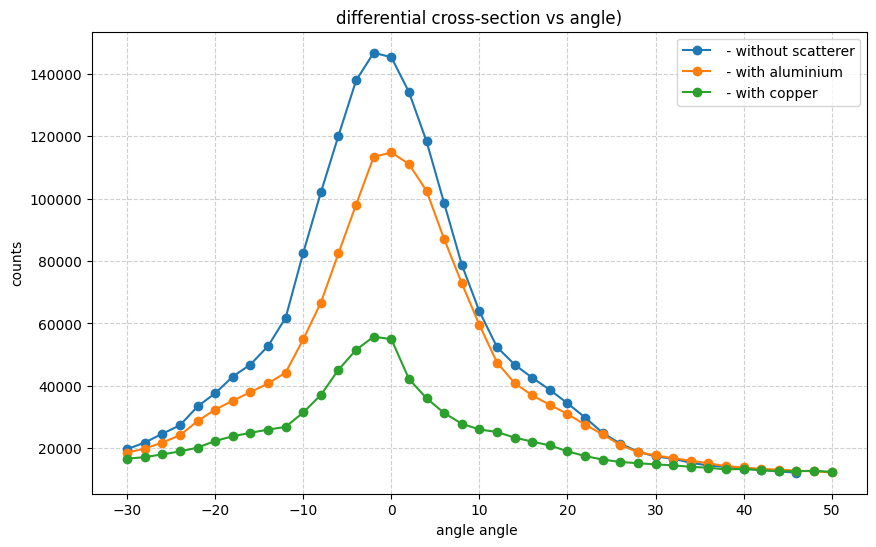

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog

print("Please upload your Gaia data excel file:")
uploaded1 = files.upload()
# Load the uploaded file into a pandas DataFrame
filename1 = list(uploaded1.keys())[0]  # Get the uploaded file name
# Assuming the file is an excel file. If it is a csv you can change it back to pd.read_csv
# Added encoding='latin1' or 'ISO-8859-1' or 'cp1252'
df1 = pd.read_excel(filename1, engine='openpyxl')
    #df = pd.read_excel(filename, engine='openpyxl', encoding='ISO-8859-1') # try a different encoding

print(f"File '{filename1}' uploaded successfully!")


# Extract X and Y values
x_values = df1.iloc[:, 0]  # First column as X-axis
y_series_1 = df1.iloc[:, 1:4]  # Next three columns as first Y-series
y_series_2 = df1.iloc[:, 4:7]  # Next three columns as second Y-series
y_series_3 = df1.iloc[:, 7:10] # Next three columns as third Y-series

# Plot the data
# Plot the data
plt.figure(figsize=(10, 6))

# Plot each series with a different color and label
for col in y_series_1.columns:
    plt.plot(x_values, df1[col], label=f" - {col}",marker='o')  # Blue for Series 1

plt.xlabel("angle " + df1.columns[0])
plt.ylabel("counts")
plt.title("differential cross-section vs angle)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Please upload your Gaia data excel file:


Saving differential cross -section .xlsx to differential cross -section  (1).xlsx
File 'differential cross -section  (1).xlsx' uploaded successfully!
Gaussian fit for without scatterer: A = 128659.58, mu = -1.02, sigma = 11.48
Gaussian fit for with aluminium: A = 96958.65, mu = 0.28, sigma = 12.71
Gaussian fit for with copper: A = 37813.79, mu = -0.69, sigma = 21.90


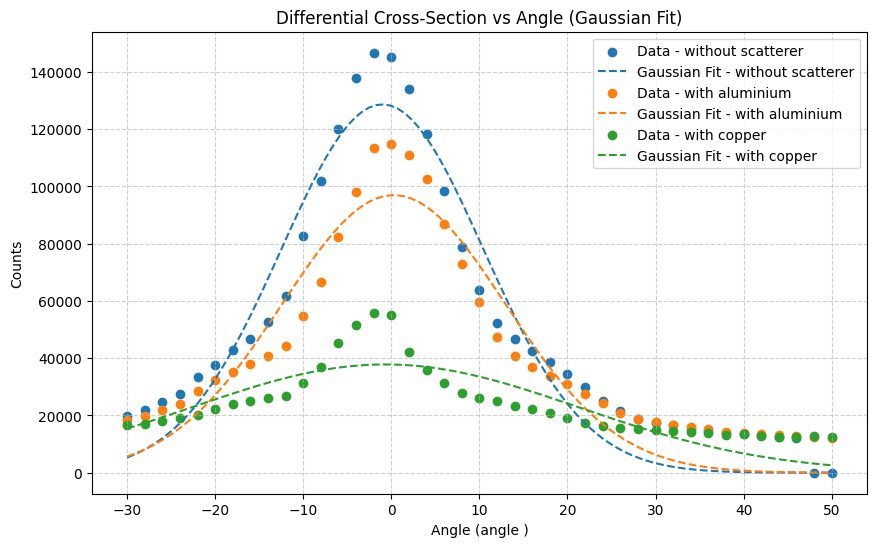

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from tkinter import filedialog # No need for Tkinter
from google.colab import files # Import the necessary module for file upload
from scipy.optimize import curve_fit

print("Please upload your Gaia data excel file:")
uploaded = files.upload()  # This will open the Colab file upload interface
filename = list(uploaded.keys())[0]  # Get the uploaded file name

# Continue with loading and processing the data using pandas as before
df1 = pd.read_excel(filename, engine='openpyxl')  # Load the uploaded file

print(f"File '{filename}' uploaded successfully!")

# Extract X and Y values
x_values = df1.iloc[:, 0].values  # First column as X-axis
y_series_1 = df1.iloc[:, 1:4]  # Next three columns as first Y-series

# Define Gaussian function
def gaussian(x, A, mu, sigma):
    return A * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

# Plot the data
plt.figure(figsize=(10, 6))

for col in y_series_1.columns:
    y_values = df1[col].values  # Extract Y values for each series

    # Replace inf and NaN values with finite values
    y_values = np.nan_to_num(y_values) # This line replaces inf and NaN

    # Initial guess for Gaussian parameters [A, mu, sigma]
    A_guess = max(y_values)
    mu_guess = x_values[np.argmax(y_values)]  # Peak position
    sigma_guess = (max(x_values) - min(x_values)) / 10  # Rough estimate of width

    # Fit Gaussian curve
    popt, _ = curve_fit(gaussian, x_values, y_values, p0=[A_guess, mu_guess, sigma_guess])

    # Generate fitted curve
    x_fit = np.linspace(min(x_values), max(x_values), 100)
    y_fit = gaussian(x_fit, *popt)

    # Plot data and fit
    plt.scatter(x_values, y_values, label=f"Data - {col}", marker='o')
    plt.plot(x_fit, y_fit, linestyle='--', label=f"Gaussian Fit - {col}")

    # Print best-fit parameters
    print(f"Gaussian fit for {col}: A = {popt[0]:.2f}, mu = {popt[1]:.2f}, sigma = {popt[2]:.2f}")

# Labels and title
plt.xlabel(f"Angle ({df1.columns[0]})")
plt.ylabel("Counts")
plt.title("Differential Cross-Section vs Angle (Gaussian Fit)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

 Angle (°)  cos(θ)  σ (barns/sr)
      0.00  1.0000        7.9406
      1.01  0.9998        7.9362
      2.01  0.9994        7.9230
      3.02  0.9986        7.9012
      4.02  0.9975        7.8708
      5.03  0.9962        7.8320
      6.03  0.9945        7.7850
      7.04  0.9925        7.7300
      8.04  0.9902        7.6673
      9.05  0.9876        7.5973
     10.06  0.9846        7.5202
     11.06  0.9814        7.4365
     12.07  0.9779        7.3465
     13.07  0.9741        7.2506
     14.08  0.9700        7.1493
     15.08  0.9655        7.0430
     16.09  0.9608        6.9322
     17.09  0.9558        6.8172
     18.10  0.9505        6.6986
     19.11  0.9449        6.5767
     20.11  0.9390        6.4521
     21.12  0.9328        6.3251
     22.12  0.9264        6.1962
     23.13  0.9196        6.0657
     24.13  0.9126        5.9341
     25.14  0.9053        5.8017
     26.15  0.8977        5.6688
     27.15  0.8898        5.5359
     28.16  0.8817        5.4032
     29.16

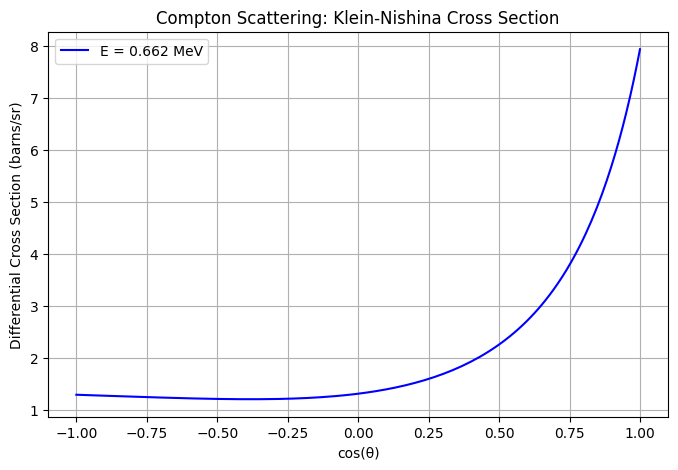

Total differential cross-section: 2.6104e+01 barns
Area under the curve from cos(θ) = -1 to +1: -4.1545e+00 barns·sr
Total differential cross-section theoretical for aluminium : -3.39e+02 barn per atom
Total differential cross-section theoretical for copper : -7.57e+02 barns per atom


<ipython-input-7-9e7dfaf01b82>:59: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  total_cross_section = 2 * np.pi * simps(cross_sections * np.sin(angles), angles)
<ipython-input-7-9e7dfaf01b82>:63: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  area_under_curve = simps(cross_sections, cos_theta)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import simps
# Constants
ehc = 2.426e-12  # Electron Compton wavelength (m)
m_e = 9.109e-31  # Electron mass (kg)
c = 3.0e8  # Speed of light (m/s)
e = 1.602e-19  # Electron charge (C)
h = 6.626e-34  # Planck's constant (J.s)

# Klein-Nishina formula for differential cross-section (in barns per steradian)
def klein_nishina(E, theta):
    """
    E: Incident photon energy in MeV
    theta: Scattering angle in radians
    Returns differential cross-section in barns per steradian.
    """
    E_rest = 0.511  # Rest energy of electron in MeV
    alpha = E / E_rest  # Dimensionless energy parameter
    w=(1 - np.cos(theta))
    p=1 + alpha * w
    q=1 + np.cos(theta)*np.cos(theta)
    r=1+q*alpha*w
    # Klein-Nishina formula
    r_e = 2.8179e-15  # Classical electron radius (m)
    sigma = (r_e**2 / 2) *(q/(p*p))*(1+w*w*alpha*alpha/(1+q*alpha*w))
    sigma *= 1e30  # Convert to barns (1 barn = 1e-28 m²)
    return sigma

# Parameters
E_incident = 0.662  # Incident photon energy in MeV
angles = np.linspace(0, np.pi,180)  # Scattering angles in radians
cos_theta = np.cos(angles)  # Cosine of scattering angles
cross_sections = klein_nishina(E_incident, angles)

# Convert angles to degrees for readability
angles_degrees = np.degrees(angles)
# Create a table
data = {
    "Angle (°)": np.round(angles_degrees, 2),
    "cos(θ)": np.round(cos_theta, 4),
    "σ (barns/sr)": np.round(cross_sections, 4),
}

df = pd.DataFrame(data)
print(df.to_string(index=False))  # Print the table without row index
# Plot results
plt.figure(figsize=(8, 5))
plt.plot(cos_theta, cross_sections, label=f'E = {E_incident} MeV', color='b')
plt.xlabel('cos(θ)')
plt.ylabel('Differential Cross Section (barns/sr)')
plt.title('Compton Scattering: Klein-Nishina Cross Section')
plt.legend()
plt.grid()
plt.show()

# Compute total cross-section using numerical integration
total_cross_section = 2 *
 np.pi * simps(cross_sections * np.sin(angles), angles)
print(f"Total differential cross-section: {total_cross_section:.4e} barns")

# Integrate over cos(theta) from -1 to 1
area_under_curve = simps(cross_sections, cos_theta)

print(f"Area under the curve from cos(θ) = -1 to +1: {area_under_curve:.4e} barns·sr")

# total cross-section using al scatter (theortical value)
total_cross_section_theoretical = 13*area_under_curve*2*np.pi
print(f"Total differential cross-section theoretical for aluminium : {total_cross_section_theoretical:.2e} barn per atom")

#total  cross-section using cu scatter
total_cross_section_theoretical = 29*area_under_curve*2*np.pi
print(f"Total differential cross-section theoretical for copper : {total_cross_section_theoretical:.2e} barns per atom")


Enter bottom diameter of frustum (cm): 5.058
Enter top diameter of frustum (cm): 5.628
Enter height of frustum (cm): 19.28
Effective volume of beam path on scatterer: 4.3269e+02 mm³
Enter diameter detected(mm) : 5.058
Enter radius of detector (mm): 3.02
Enter distance between scatterer and detector (mm): 23.4
Detector area: 2.8653e+01 mm²
Solid angle subtended by detector: 5.2328e-02 sr
Enter max counts per minute detected: 152393
Incident photon intensity: 1.5169e+04 photons/sec
Electron number density: 1.0584e+24 electrons/m³
Enter scattered photon count for 50.0°: 8622
Enter scattered photon count for 60.0°: 7433
Enter scattered photon count for 70.0°: 5268
Enter scattered photon count for 80.0°: 4075

Experimental Differential Cross-Section Table:

 Angle (°)  cos(θ)  N_s (Scattered Particles)  σ_exp (barns)
        50  0.6428                     1724.4       2.052570
        60  0.5000                     1486.6       1.769514
        70  0.3420                     1053.6       1.

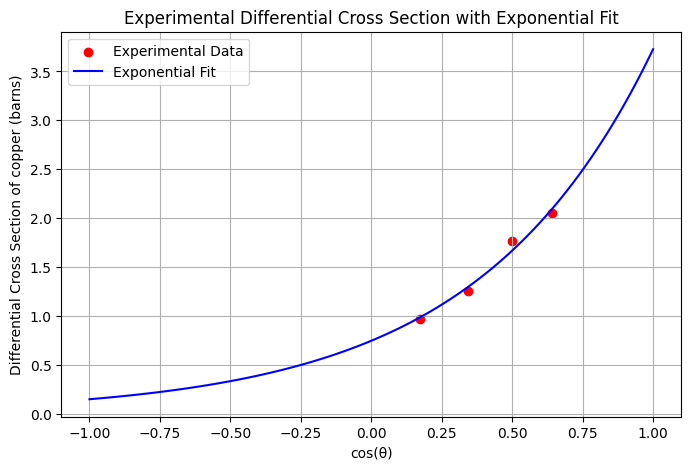

Area under the exponential fit curve from -1 to 1: 2.2261e+00 barns
Total differential cross-section theoretical for copper : 4.0541e+00 barnsper atom


In [ ]:
#for copper
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy.integrate import quad

# User inputs for frustum volume calculation
R1 = float(input("Enter bottom diameter of frustum (cm): "))
R2 = float(input("Enter top diameter of frustum (cm): "))
h = float(input("Enter height of frustum (cm): "))

# Compute effective volume (m³)
V_eff = (1/12) * np.pi * h * (R1**2 + R1 * R2 + R2**2)
print(f"Effective volume of beam path on scatterer: {V_eff:.4e} mm³")

# User input for solid angle calculation
detected_radius = float(input("Enter diameter detected(mm) : "))
detector_radius = float(input("Enter radius of detector (mm): "))
detector_distance = float(input("Enter distance between scatterer and detector (mm): "))

# Compute detector area and solid angle
A_detector = np.pi * detector_radius**2
A_beampath = np.pi * detected_radius**2/4
print(f"Detector area: {A_detector:.4e} mm²")
solid_angle = A_detector / (detector_distance**2)
print(f"Solid angle subtended by detector: {solid_angle:.4e} sr")

# User input for intensity calculation
N_max = int(input("Enter max counts per minute detected: "))
N_i = N_max*2 /A_beampath   # Convert to counts per second
print(f"Incident photon intensity: {N_i:.4e} photons/sec")

# Constants for scatterer (copper)
density_scatterer = 8.9 # g/cm³
atomic_mass_scatterer = 63.54# kg/mol
Avogadro_number = 6.022e23  # atoms/mol
Z = 29  # Atomic number of copper

# Calculate electron number density (electrons per m³)
n_e = (density_scatterer * Avogadro_number * Z*V_eff) / atomic_mass_scatterer*1e-3
print(f"Electron number density: {n_e:.4e} electrons/m³")

# Define scattering angles (50°, 60°, 70°, 80°, 90°) in degrees and convert to radians
angles_degrees = np.arange(50, 81, 10)
angles_radians = np.radians(angles_degrees)  # Convert to radians
cos_theta = np.cos(angles_radians)  # Compute cos(θ)

# Initialize lists for storing scattered counts and cross-section
N_s = []
diff_cross_section = []

# Ask user for experimental values
for angle in angles_degrees:
    count = float(input(f"Enter scattered photon count for {angle:.1f}°: ")) / 5  # Convert to counts/sec
    N_s.append(count)
    sigma = (count / (n_e * N_i * solid_angle)) * 1e24  # Convert to barns/sr (1 barn = 1e-28 m²)
    diff_cross_section.append(sigma)

# Convert lists to numpy arrays
N_s = np.array(N_s)
diff_cross_section = np.array(diff_cross_section)

# Define exponential function for fitting
def exponential(x, a, b):
    return a * np.exp(b * x)

# Fit exponential curve to data
popt, _ = curve_fit(exponential, cos_theta, diff_cross_section, p0=[max(diff_cross_section), -1])

# Generate fitted curve
cos_theta_fit = np.linspace(-1, 1, 100)
diff_cross_fit = exponential(cos_theta_fit, *popt)


# Create a results table
data = {
    "Angle (°)": np.round(angles_degrees, 2),
    "cos(θ)": np.round(cos_theta, 4),
    "N_s (Scattered Particles)": N_s,
    "σ_exp (barns)": np.round(diff_cross_section, 6),
}

df = pd.DataFrame(data)
print("\nExperimental Differential Cross-Section Table:\n")
print(df.to_string(index=False))  # Print table without row index



# Plot results
plt.figure(figsize=(8, 5))
plt.scatter(cos_theta, diff_cross_section, label="Experimental Data", color='r', marker='o')
plt.plot(cos_theta_fit, diff_cross_fit, label="Exponential Fit", color='b')
plt.xlabel('cos(θ)')
plt.ylabel('Differential Cross Section of copper (barns)')
plt.title('Experimental Differential Cross Section with Exponential Fit')
plt.legend()
plt.grid()
plt.show()
# Compute area under the exponential fit curve from -1 to 1
area, _ = quad(lambda x: exponential(x, *popt), -1, 1)
print(f"Area under the exponential fit curve from -1 to 1: {area:.4e} barns")

# compute the total cross section of copper
total_cross_section_theoretical1 = 29*area*2*3.14*1e-2
print(f"Total differential cross-section theoretical for copper : {total_cross_section_theoretical1:.4e} barnsper atom")

 Angle (°)  cos(θ)  σ (barns/sr)
         0  1.0000        7.9406
         5  0.9962        7.8332
        10  0.9848        7.5247
        15  0.9659        7.0520
        20  0.9397        6.4661
        25  0.9063        5.8201
        30  0.8660        5.1614
        35  0.8192        4.5266
        40  0.7660        3.9404
        45  0.7071        3.4169
        50  0.6428        2.9617
        55  0.5736        2.5746
        60  0.5000        2.2517
        65  0.4226        1.9869
        70  0.3420        1.7734
        75  0.2588        1.6046
        80  0.1736        1.4740
        85  0.0872        1.3757
        90  0.0000        1.3044
        95 -0.0872        1.2552
       100 -0.1736        1.2238
       105 -0.2588        1.2062
       110 -0.3420        1.1988
       115 -0.4226        1.1989
       120 -0.5000        1.2038
       125 -0.5736        1.2118
       130 -0.6428        1.2214
       135 -0.7071        1.2315
       140 -0.7660        1.2416
       145

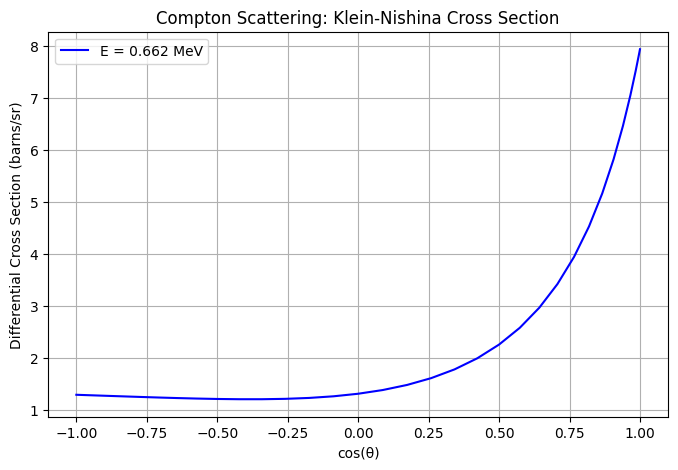

Total differential cross-section: 2.6104e+01 barns
Area under the curve from cos(θ) = -1 to +1: -4.1545e+00 barns·sr
Total differential cross-section theoretical for aluminium : -3.39e+02 barn per atom
Total differential cross-section theoretical for copper : -7.57e+02 barns per atom


<ipython-input-9-d0a1d3573a67>:61: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  total_cross_section = 2 * np.pi * simps(cross_sections * np.sin(angles_radians), angles_radians)
<ipython-input-9-d0a1d3573a67>:65: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  area_under_curve = simps(cross_sections, cos_theta)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import simps

# Constants
ehc = 2.426e-12  # Electron Compton wavelength (m)
m_e = 9.109e-31  # Electron mass (kg)
c = 3.0e8  # Speed of light (m/s)
e = 1.602e-19  # Electron charge (C)
h = 6.626e-34  # Planck's constant (J.s)

# Klein-Nishina formula for differential cross-section (in barns per steradian)
def klein_nishina(E, theta):
    """
    E: Incident photon energy in MeV
    theta: Scattering angle in radians
    Returns differential cross-section in barns per steradian.
    """
    E_rest = 0.511  # Rest energy of electron in MeV
    alpha = E / E_rest  # Dimensionless energy parameter
    w = (1 - np.cos(theta))
    p = 1 + alpha * w
    q = 1 + np.cos(theta) * np.cos(theta)
    r = 1 + q * alpha * w
    # Klein-Nishina formula
    r_e = 2.8179e-15  # Classical electron radius (m)
    sigma = (r_e**2 / 2) * (q / (p * p)) * (1 + w * w * alpha * alpha / (1 + q * alpha * w))
    sigma *= 1e30  # Convert to barns (1 barn = 1e-28 m²)
    return sigma

# Parameters
E_incident = 0.662  # Incident photon energy in MeV
angles_degrees = np.arange(0, 181, 5)  # Angles from 0 to 180 degrees with 5-degree step
angles_radians = np.radians(angles_degrees)  # Convert to radians
cos_theta = np.cos(angles_radians)  # Cosine of scattering angles
cross_sections = klein_nishina(E_incident, angles_radians)

# Create a table
data = {
    "Angle (°)": np.round(angles_degrees, 2),
    "cos(θ)": np.round(cos_theta, 4),
    "σ (barns/sr)": np.round(cross_sections, 4),
}

df = pd.DataFrame(data)
print(df.to_string(index=False))  # Print the table without row index


# Plot results
plt.figure(figsize=(8, 5))
plt.plot(cos_theta, cross_sections, label=f'E = {E_incident} MeV', color='b')
plt.xlabel('cos(θ)')
plt.ylabel('Differential Cross Section (barns/sr)')
plt.title('Compton Scattering: Klein-Nishina Cross Section')
plt.legend()
plt.grid()
plt.show()

# Compute total cross-section using numerical integration
total_cross_section = 2 * np.pi * simps(cross_sections * np.sin(angles_radians), angles_radians)
print(f"Total differential cross-section: {total_cross_section:.4e} barns")

# Integrate over cos(theta) from -1 to 1
area_under_curve = simps(cross_sections, cos_theta)

print(f"Area under the curve from cos(θ) = -1 to +1: {area_under_curve:.4e} barns·sr")

# total cross-section using al scatter (theortical value)
total_cross_section_theoretical = 13 * area_under_curve * 2 * np.pi
print(f"Total differential cross-section theoretical for aluminium : {total_cross_section_theoretical:.2e} barn per atom")

# total cross-section using cu scatter
total_cross_section_theoretical = 29 * area_under_curve * 2 * np.pi
print(f"Total differential cross-section theoretical for copper : {total_cross_section_theoretical:.2e} barns per atom")